In [121]:
import numpy as np
import pandas as pd 
import seaborn as sn
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


## Part 1: understanding the data

In [79]:
# reading the data set
df = pd.read_csv("data/tips-new.csv")
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [80]:
# Get some usefull information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In the previous cell, we have:

-column names.

-number of entries: 244.

-number of non-values: 0, since the number of entries is equal to non values in every column.

-Data types: 3 numerical columns (1 integer and 2 floats), 4 object (string) columns.

In [82]:
#let's see a distribution for the numerical columns
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [85]:
# let's see the distribution of the non-numerical columns.
df.describe(include='object')

sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176

 Now we have some important information:

##### Numerical columns:

We know the mean values of all the numerical columns, as the minimum value, maximum value, standar devation and the percentiles. We now know that the bigest tip was 10 dlls, the biggest bill was 50.81 dlls and thate the maximum size of a party was 6 people.

##### Object columns:

For the object columns we now know that the 'sex', 'smoker' and 'time' columns are binary, as they only have two possible values. The 'day' column has 4 possible values that we'll find later.

We also know that 157 bills were paid by men, 151 customers were non smokers, 87 bills were paid on Saturday and 176 of the total bills were for dinner.


In [108]:
# We'll get the unique values of the object columns 
for i in ['sex','day','smoker','time']:
    print(i+': '+ ', '.join(df[i].unique()))

sex: Female, Male
day: Sun, Sat, Thur, Fri
smoker: No, Yes
time: Dinner, Lunch


## Part 2: looking for the values distribution

Here we want to see a graphic distribution of the paid bills, grouped by 'sex', 'day', 'smoker' and 'time'.


In [164]:
c_palette = ['tab:blue', 'tab:pink']
s_palette = ['tab:blue', 'tab:pink', 'tab:red', 'tab:green', 'tab:orange','tab:purple']
def cs(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sn.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()


count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object
mode:  0    Dinner
Name: time, dtype: object
Dinner    176
Lunch      68
Name: time, dtype: int64


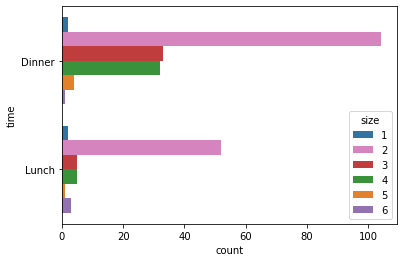

In [165]:
cs(df, y = 'time', hue='size' ,palette=s_palette)


count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object
mode:  0    Sat
Name: day, dtype: object
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


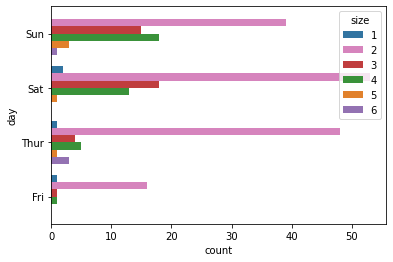

In [166]:
cs(df, y = 'day', hue='size' ,palette=s_palette)

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object
mode:  0    Male
Name: sex, dtype: object
Male      157
Female     87
Name: sex, dtype: int64


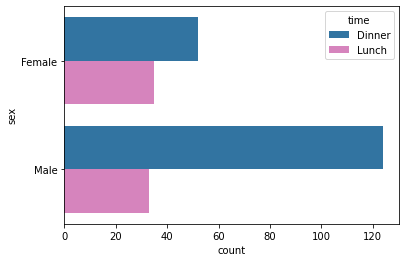

In [162]:
cs(df, y = 'sex', hue='time' ,palette=c_palette)


count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object
mode:  0    Male
Name: sex, dtype: object
Male      157
Female     87
Name: sex, dtype: int64


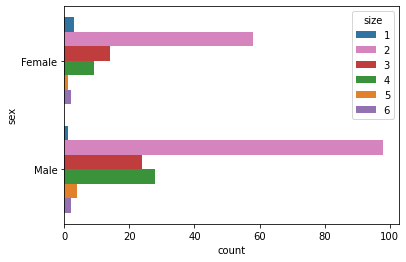

In [167]:
cs(df, y = 'sex', hue='size' ,palette=s_palette)

<AxesSubplot:xlabel='sex'>

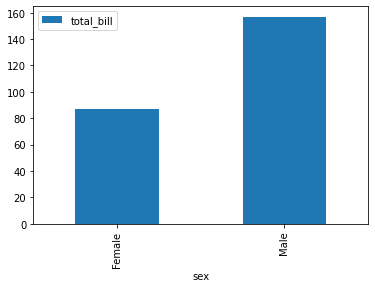

In [114]:
df[['sex','total_bill']].groupby('sex').count().plot(kind='bar')

<AxesSubplot:xlabel='day'>

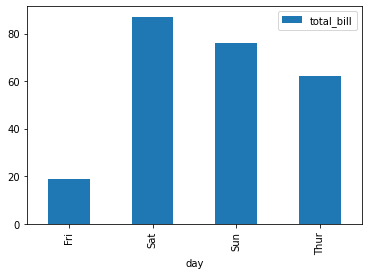

In [115]:
df[['day','total_bill']].groupby('day').count().plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

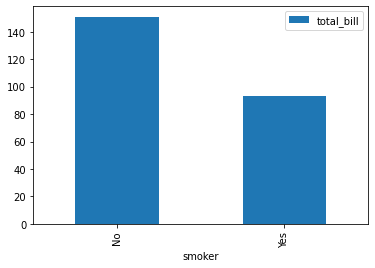

In [117]:
df[['smoker','total_bill']].groupby('smoker').count().plot(kind='bar')

<AxesSubplot:xlabel='time'>

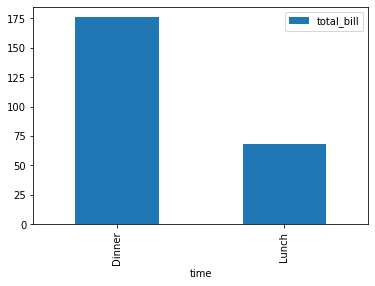

In [118]:
df[['time','total_bill']].groupby('time').count().plot(kind='bar')

<AxesSubplot:xlabel='smoker', ylabel='tip'>

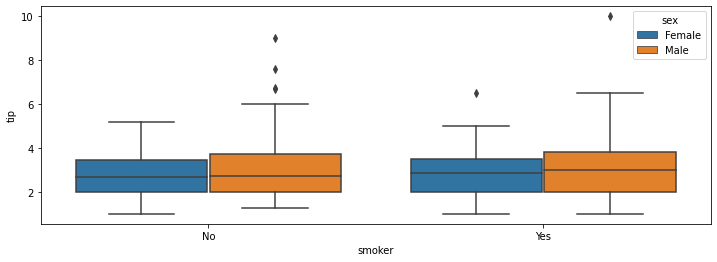

In [180]:
plt.figure(figsize=(12, 4))
sn.boxplot(x = "smoker", y = "tip", hue = "sex", data=df)


<AxesSubplot:xlabel='day', ylabel='tip'>

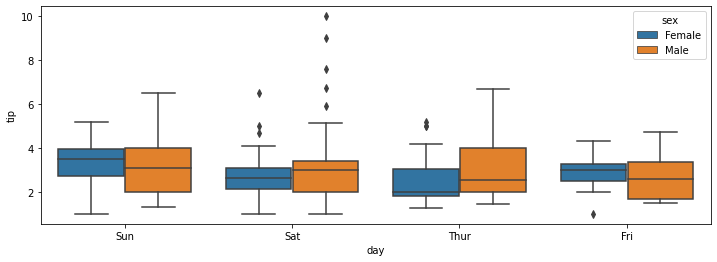

In [184]:
plt.figure(figsize=(12, 4))
sn.boxplot(x = "day", y = "tip", hue = "sex", data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

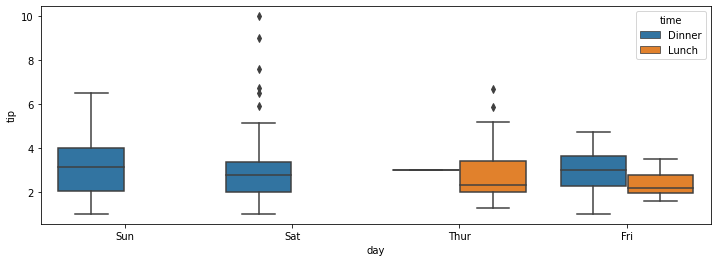

In [185]:
plt.figure(figsize=(12, 4))
sn.boxplot(x = "day", y = "tip", hue = "time", data=df)

In [187]:
df.groupby(['day','time']).count()

total_bill  tip  sex  smoker  size  tip_rate
day  time                                                
Fri  Dinner          12   12   12      12    12        12
     Lunch            7    7    7       7     7         7
Sat  Dinner          87   87   87      87    87        87
Sun  Dinner          76   76   76      76    76        76
Thur Dinner           1    1    1       1     1         1
     Lunch           61   61   61      61    61        61

<AxesSubplot:xlabel='size', ylabel='tip'>

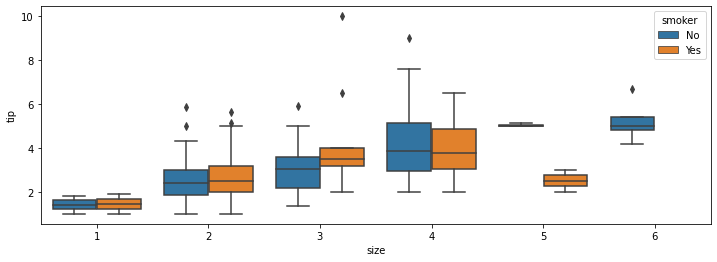

In [189]:
plt.figure(figsize=(12, 4))
sn.boxplot(x = "size", y = "tip", hue = "smoker", data=df)

So, there are clearly more men who paid the total bills.

The day that has more bills paid is Saturday, followed by Sunday and Thursday. Being Friday the day with the least paid bills.

There are more non-smoker customers than smoker ones.

And dinner is the time when the most bills were paid.


## Part 3: looking for correlation betwen variables.

/Users/andresva/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


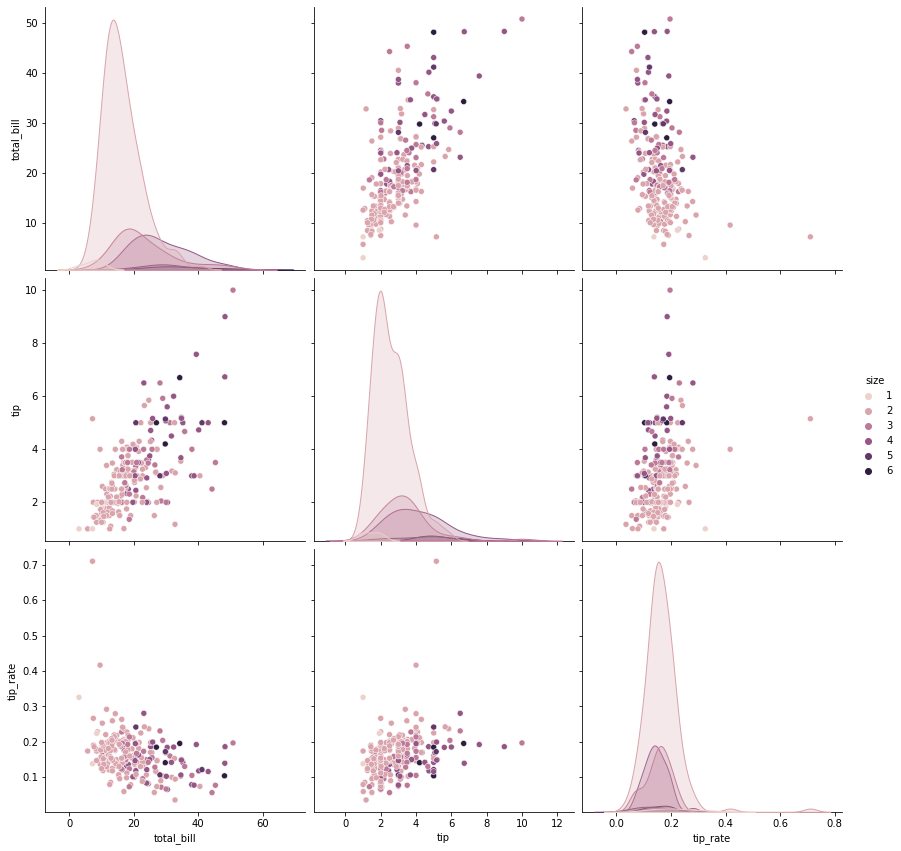

In [173]:
sn.pairplot(df, hue="size", size=4)
plt.show()


/Users/andresva/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


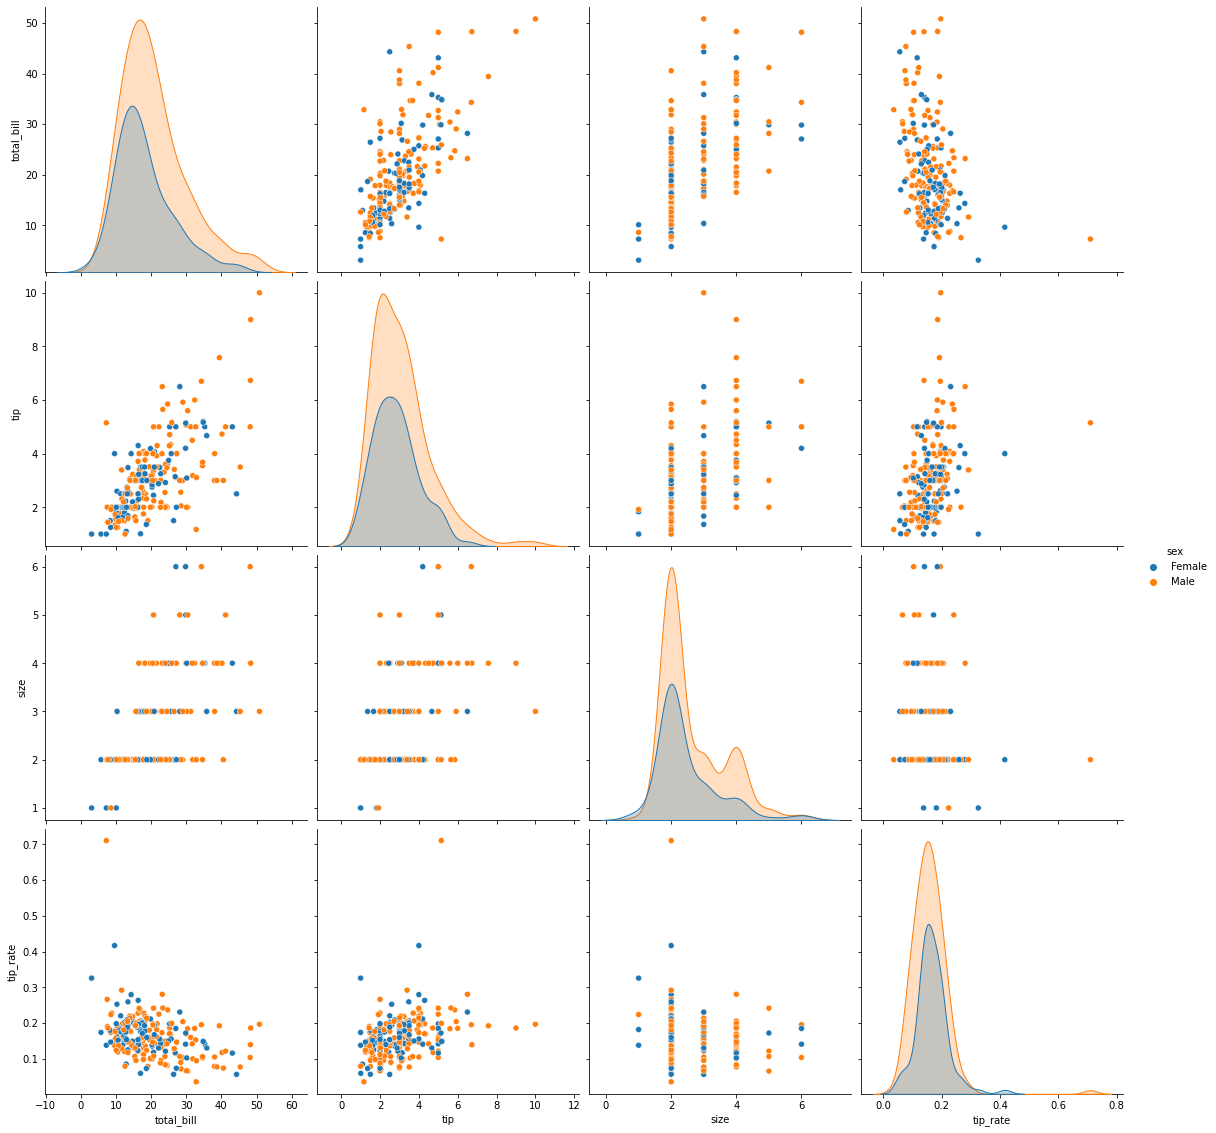

In [174]:
sn.pairplot(df, hue="sex", size=4)
plt.show()


/Users/andresva/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


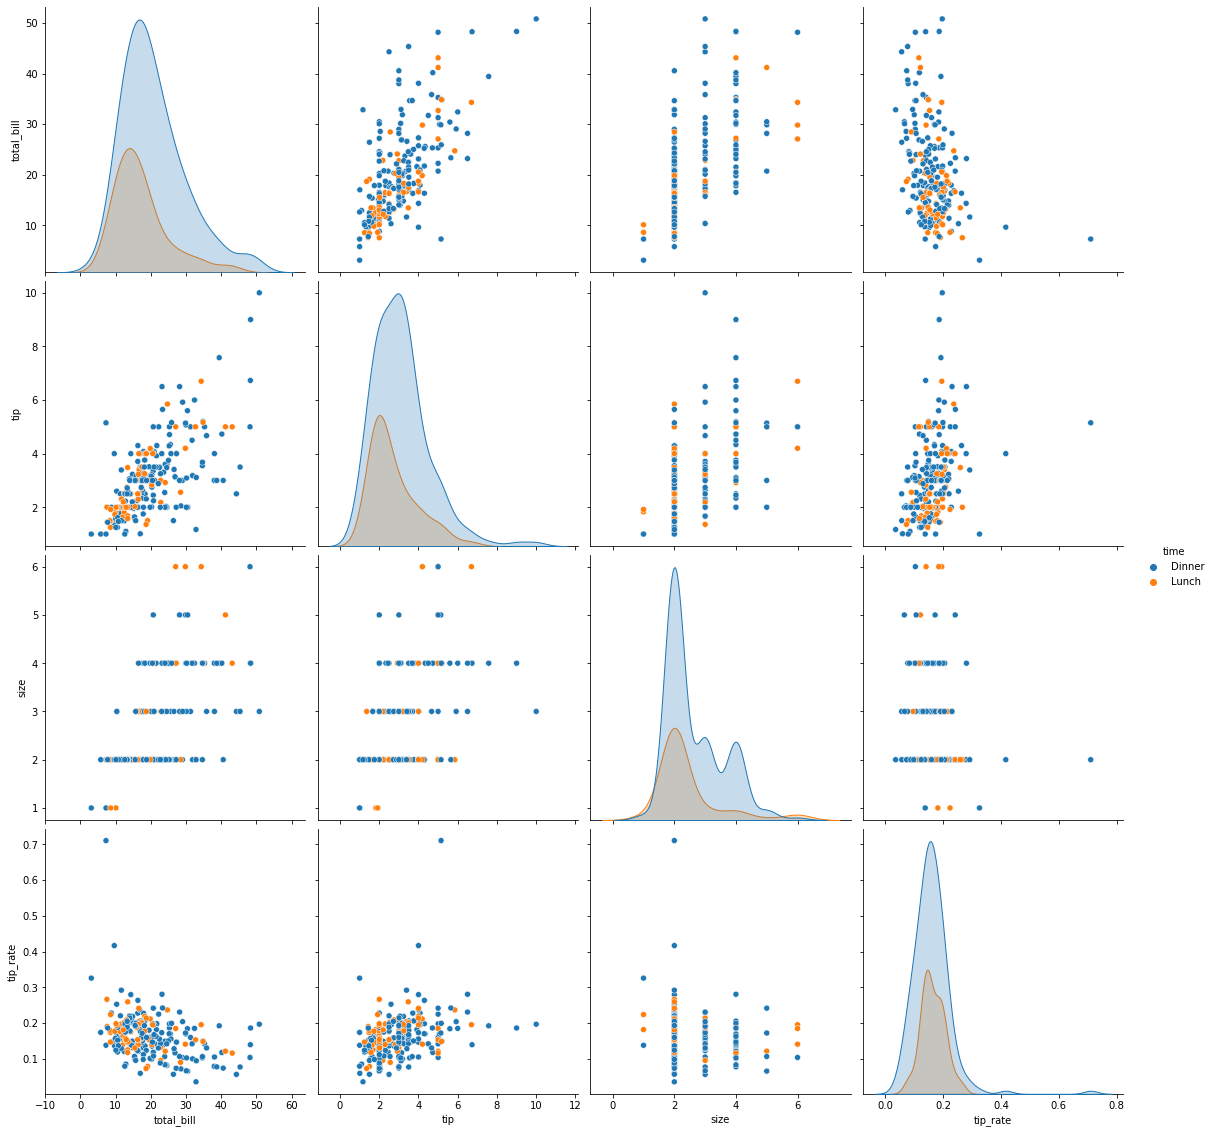

In [175]:
sn.pairplot(df, hue="time", size=4)
plt.show()


/Users/andresva/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


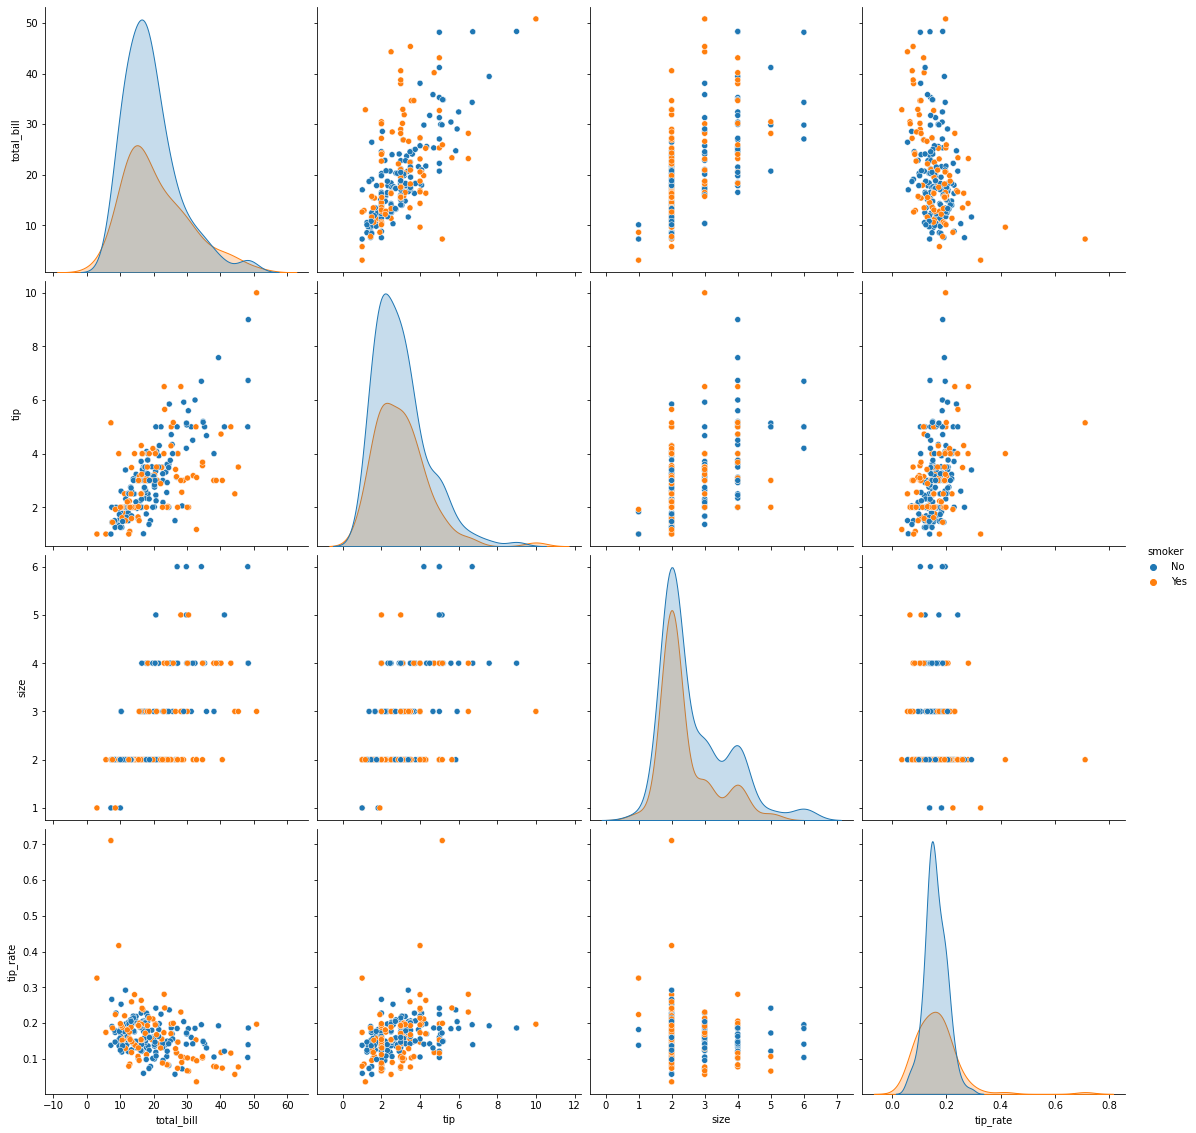

In [176]:
sn.pairplot(df, hue="smoker", size=4)
plt.show()


From this scatter matrix we can conclude that the only variable 'related' to the amount of the tip is the total bill. But we need to review the correlation coefficients. 

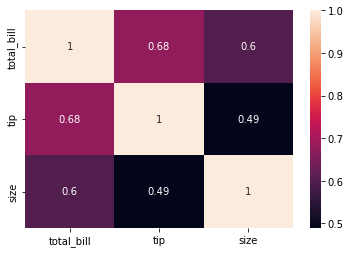

In [15]:
sn.heatmap(df.corr(), annot=True)
plt.show()

As we can see the correlation between the total bills and the tips is stronger compared to the relation between the size of the table and the amount of the tips that the waiters received.

Let's check if this correlation is maintained if we separate the customers based on their gender.


<AxesSubplot:ylabel='sex-None'>

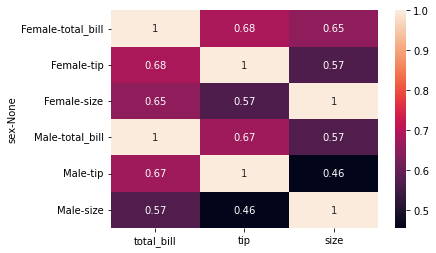

In [18]:
sn.heatmap(df.groupby('sex').corr(), annot=True)

To specify the previous matrix we can illustrate the results based on different genders. Hence, we can conclude that regarding the same size of the table women paid more tips compared to men.


In [124]:
spearmanr(df['tip'],df['total_bill'])

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923584e-34)

So, we have a correlation spearman coefficient of 0.67 that is significant because the p value is < 0.05

From here we can say that the correlation between the total bill and the tip amount does exist.



Now let's create a new column called 'tip_rate' that will be the rate between the total bill and the tip.


In [126]:
df['tip_rate'] = df['tip']/df['total_bill']
df['tip_rate'].describe()

count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
Name: tip_rate, dtype: float64

From here we can say that the maximum rate was 0.71 from the total bill. And the minimum was 0.035.

<AxesSubplot:xlabel='total_bill'>

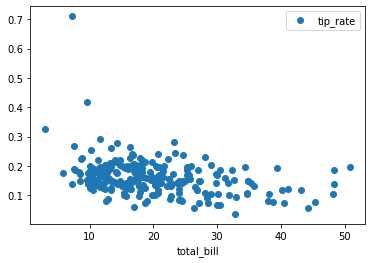

In [129]:
df.plot(x = 'total_bill', y = 'tip_rate', style = 'o')

From this graph we can see a correlation between the total bill and the tip rate. Which is as spected as the percentage of the tip most of the times is between 10% and 20% in USA.


## Part 4.1: Some more analysis
Since boxplots are not only an efficient summary of univariate charts, but can also be used effectively to compare variables that are in the same units of measurement. In this section we are using boxplots to illustrate more univariate charts between tips and sex, tips and ‘smoker’, tips and ‘day, tips and ‘time’, respectively.

<AxesSubplot:xlabel='sex', ylabel='tip'>

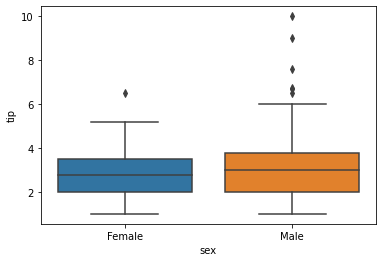

In [148]:
plt.figure()
sn.boxplot(x= 'sex',  y = 'tip', data=df)


<AxesSubplot:xlabel='smoker', ylabel='tip'>

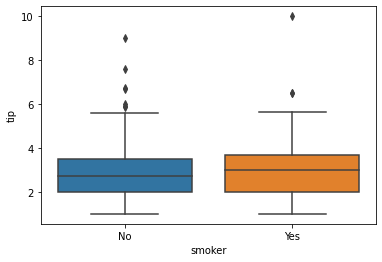

In [149]:
plt.figure()
sn.boxplot(x= 'smoker',  y = 'tip', data=df)


<AxesSubplot:xlabel='day', ylabel='tip'>

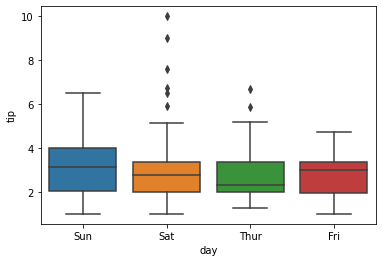

In [150]:
plt.figure()
sn.boxplot(x= 'day',  y = 'tip', data=df)


<AxesSubplot:xlabel='size', ylabel='tip'>

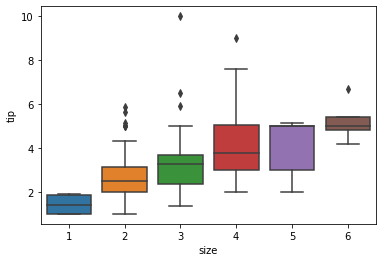

In [151]:
plt.figure()
sn.boxplot(x= 'size',  y = 'tip', data=df)


## Part 4.2: impact of all variables on the tip_rate

In [138]:
import statsmodels.formula.api as sm
data = pd.get_dummies(df)
data.head()

total_bill   tip  size  tip_rate  sex_Female  sex_Male  smoker_No  \
0       16.99  1.01     2  0.059447           1         0          1   
1       10.34  1.66     3  0.160542           0         1          1   
2       21.01  3.50     3  0.166587           0         1          1   
3       23.68  3.31     2  0.139780           0         1          1   
4       24.59  3.61     4  0.146808           1         0          1   

   smoker_Yes  day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
0           0        0        0        1         0            1           0  
1           0        0        0        1         0            1           0  
2           0        0        0        1         0            1           0  
3           0        0        0        1         0            1           0  
4           0        0        0        1         0            1           0

In [140]:
model=sm.ols(formula="data.tip_rate~data.sex_Female +data.sex_Male+ data.smoker_No+data.smoker_Yes +data.time_Dinner+data.time_Lunch + data['size'] + data.day_Fri + data.day_Thur + data.day_Sun + data.day_Sat ",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.479
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.175
Time:                        09:35:56   Log-Likelihood:                 341.67
No. Observations:                 244   AIC:                            -667.3
Df Residuals:                     236   BIC:                            -639.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0697      0.004     15.784      0.000       0.061       0.078
data.sex_Female      0.0391      0.005      8.177      0.000       0.030       0.049
data.sex_Male        0.0306      0.005      6.559      0.000       0.021       0.040
data.smoker_No       0.0330      0.005      6.751      0.000       0.023       0.043
data.smoker_Yes      0.0367      0.005      7.829      0.000       0.027       0.046
data.time_Dinner     0.0232      0.012      1.856      0.065      -0.001       0.048
data.time_Lunch      0.0465      0.014      3.330      0.001       0.019       0.074
data['size']        -0.0096      0.004     -2.282      0.023      -0.018      -0.001
data.day_Fri         0.0182      0.011      1.587      0.114      -0.004       0.041
data.day_Thur     6.167e-05      0.018      0.003      0.997      -0.036       0.036
data.day_Sun         0.0349      0.012      2.981      0.003       0.012       0.058
data.day_Sat         0.0165      0.011      1.459      0.146      -0.006       0.039
==============================================================================
Omnibus:                      214.408   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7088.439
Skew:                           3.189   Prob(JB):                         0.00
Kurtosis:                      28.623   Cond. No.                     2.80e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Lets find out the impact of the variables on the tip rate

In [141]:
model=sm.ols(formula="data.tip_rate~data['size']",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.042
Date:                Mon, 21 Mar 2022   Prob (F-statistic):             0.0256
Time:                        09:40:47   Log-Likelihood:                 338.95
No. Observations:                 244   AIC:                            -673.9
Df Residuals:                     242   BIC:                            -666.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1844      0.011     16.475      0.000       0.162       0.206
data['size']    -0.0092      0.004     -2.245      0.026      -0.017      -0.001
==============================================================================
Omnibus:                      220.122   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7618.220
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      29.562   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
model=sm.ols(formula="data.tip_rate~data['smoker_No']",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2301
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.632
Time:                        09:41:29   Log-Likelihood:                 336.55
No. Observations:                 244   AIC:                            -669.1
Df Residuals:                     242   BIC:                            -662.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1632      0.006     25.729      0.000       0.151       0.176
data['smoker_No']    -0.0039      0.008     -0.480      0.632      -0.020       0.012
==============================================================================
Omnibus:                      217.950   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7358.565
Skew:                           3.266   Prob(JB):                         0.00
Kurtosis:                      29.099   Cond. No.                         3.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
model=sm.ols(formula="data.tip_rate~data['smoker_Yes']",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2301
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.632
Time:                        09:41:39   Log-Likelihood:                 336.55
No. Observations:                 244   AIC:                            -669.1
Df Residuals:                     242   BIC:                            -662.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1593      0.005     32.007      0.000       0.150       0.169
data['smoker_Yes']     0.0039      0.008      0.480      0.632      -0.012       0.020
==============================================================================
Omnibus:                      217.950   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7358.565
Skew:                           3.266   Prob(JB):                         0.00
Kurtosis:                      29.099   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
model=sm.ols(formula="data.tip_rate~data['total_bill']",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           5.85e-08
Time:                        09:42:00   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2068      0.009     22.975      0.000       0.189       0.224
data['total_bill']    -0.0023      0.000     -5.599      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      224.802   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7863.442
Skew:                           3.420   Prob(JB):                         0.00
Kurtosis:                      29.957   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
model=sm.ols(formula="data.tip_rate~data['sex_Male']",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.174
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.280
Time:                        09:42:46   Log-Likelihood:                 337.02
No. Observations:                 244   AIC:                            -670.0
Df Residuals:                     242   BIC:                            -663.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1665      0.007     25.437      0.000       0.154       0.179
data['sex_Male']    -0.0088      0.008     -1.083      0.280      -0.025       0.007
==============================================================================
Omnibus:                      224.065   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8063.450
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      30.335   Cond. No.                         3.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
model=sm.ols(formula="data.tip_rate~data['sex_Female']",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.174
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.280
Time:                        11:14:18   Log-Likelihood:                 337.02
No. Observations:                 244   AIC:                            -670.0
Df Residuals:                     242   BIC:                            -663.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1577      0.005     32.356      0.000       0.148       0.167
data['sex_Female']     0.0088      0.008      1.083      0.280      -0.007       0.025
==============================================================================
Omnibus:                      224.065   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8063.450
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      30.335   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions

In [179]:
df.groupby(['sex','smoker']).count()

total_bill  tip  day  time  size  tip_rate
sex    smoker                                            
Female No              54   54   54    54    54        54
       Yes             33   33   33    33    33        33
Male   No              97   97   97    97    97        97
       Yes             60   60   60    60    60        60